<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ds5110/summer-2021/blob/master/06-Modeling-1.ipynb">
<img src="https://github.com/ds5110/summer-2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# 6  -- Modeling I

Linear regression with the diamonds dataset

* Visualizing regression models with Seaborn
* Linear regression with linear model
* Nonlinearity (linear regression with polynomials)
* Scaling -- price vs carats
* Residuals (assessing statistical assumptions)
* Distributions (histograms) -- signal vs noise
* Q-Q plots -- visualizing distributions
* Box plots (justifying multiple input/feature model)
* Categorical features

### Data

* [diamonds dataset](https://ggplot2.tidyverse.org/reference/diamonds.html) -- tidyverse.org

### References

* [scikit-learn](https://scikit-learn.org/stable/) (Machine Learning in Python) -- scikit-learn.org
  * [scikit-learn User Guide](https://sklearn.org/user_guide.html)
  * [Generalized Linear Models](https://sklearn.org/modules/linear_model.html)
  * [Gaussian Process Regression](https://sklearn.org/auto_examples/gaussian_process/plot_gpr_noisy_targets.html)
* [05.06-Linear-Regression.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb) (VanderPlas) -- github
  * [ch10.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch10/ch10.ipynb) (Raschka) -- github
* Visualization
    * [seaborn API](https://seaborn.pydata.org/api.html) reference docs -- pydata.org
        * [visualizing regression models](https://seaborn.pydata.org/tutorial/regression.html)
        * [seaborn scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
        * [seaborn regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)
    * [ggplot2 geom_smooth](https://ggplot2.tidyverse.org/reference/geom_smooth.html) (R) -- tidyverse.org

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch10/images/10_01.png" width="500px">

[Figure credit](https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch10/images/10_01.png): Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 3rd Ed. Packt Publishing, 2019.

# Linear regression

* Consider [seaborn](https://seaborn.pydata.org/tutorial/regression.html) for exploratory data analysis (EDA)
    * [Visualizing data distributions](https://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial) (tutorial) -- pydata.org
    * [Visualizing regression models](https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial) (tutorial) -- pydata.org
* Use [matplotlib](https://matplotlib.org/) for basic and customizable charts and visualization
    * Seaborn is based on matplotlib
* [scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html) has a variety of algorithms
    * 
* [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) and [statsmodels](https://www.statsmodels.org/stable/index.html) have additional statistical tools




### Reproducibility

* [random module](https://docs.python.org/dev/library/random.html) -- python.org
    * [random.seed(seed)](https://docs.python.org/dev/library/random.html#random.seed)
    * [random.normalvariate(mu, sigma)](https://docs.python.org/dev/library/random.html#random.normalvariate)
* [numpy.random](https://numpy.org/doc/stable/reference/random/index.html#quick-start) -- numpy.org

In [ ]:
# Generate some synthetic data: linear model plus random noise
import random
import numpy as np
import matplotlib.pyplot as plt

# Model
w0 = 3
w1 = 0.042
xs = np.arange(0,10)
ys = w0 + w1 * xs

# Noise
mu, sigma = 0, 0.1 # mean and standard deviation
random.seed(42) # for reproducibility
eps = [random.normalvariate(mu, sigma) for i in enumerate(xs)]

# Data
data = ys + eps

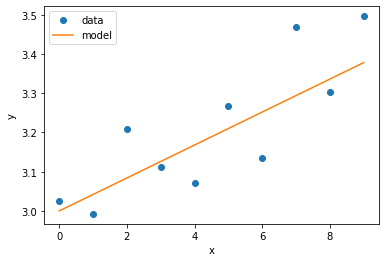

In [ ]:
# Visualization with matplotlib
plt.plot(xs, data,'o', label='data')
plt.plot(xs, ys, label='model')
plt.ylabel('y')
plt.xlabel('x')
plt.legend();

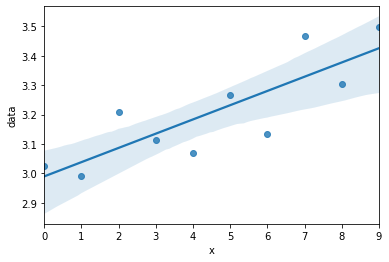

In [ ]:
# Visualizing linear regression with seaborn
import seaborn as sns
import pandas as pd

array = np.array([xs, data]).transpose()
df_simple = pd.DataFrame(data=array, index=xs, columns=['x', 'data'])

sns.regplot(x='x', y='data', data=df_simple);

# diamonds dataset



In [ ]:
url = "https://github.com/tidyverse/ggplot2/raw/master/data-raw/diamonds.csv"
diamonds = pd.read_csv(url)

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


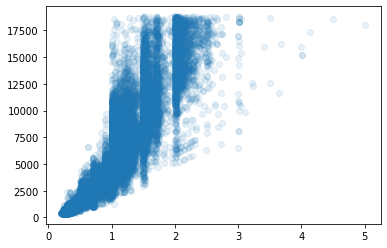

In [ ]:
# Use opacity (alpha channel) to aid visualization with large amounts of data
plt.scatter(diamonds['carat'], diamonds['price'], alpha=.1);

# Linear regression with Seaborn

* [Seaborn regression plot](https://seaborn.pydata.org/generated/seaborn.regplot.html)
* Easy to investigate nonlinearity with polynomial fit


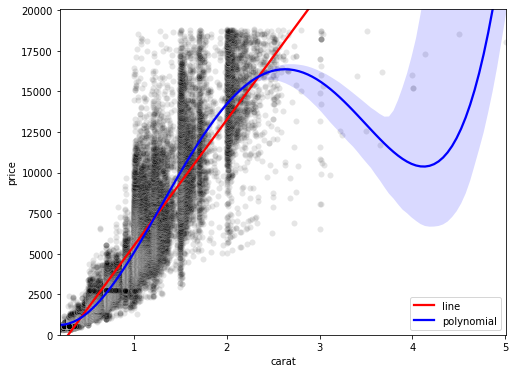

In [ ]:
# Use the entire dataset (with all the data, this cell can take up to 30 seconds)
df = diamonds

# Subsample the data (this runs in ~2 seconds)
df = df.iloc[::10, :]

# For styling, see: https://seaborn.pydata.org/generated/seaborn.regplot.html
line_kws = {'color':'red'}
curve_kws = {'color': 'blue'}

# Least squares line and polynomial
sns.scatterplot(x="carat", y="price", data=df, alpha=.1, color="black")
sns.regplot(x="carat", y="price", data=df, order=0, scatter=False, line_kws=line_kws, label="line")
sns.regplot(x="carat", y="price", data=df, order=5, scatter=False, line_kws=curve_kws, label="polynomial")

# figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# axis limits and legend
fig.gca().legend()
fig.gca().set_ylim([0, 20100]);

# Linear regression with scikit-learn

* With Scikit-Learn, algorithms are optimized for performance
* You can reproduce the seaborn visualizations with scikit-learn and matplotlib
* Scikit-learn has a consistent API designed for data science

In [ ]:
# This cell reviews some data management with pandas & numpy

# Use the entire dataset
df = diamonds

# Reminder: there are two ways to extract a column from a dataframe
X = df['carat']
X2 = df[['carat']]

# One way returns a series, the other returns a dataframe
assert isinstance(X, pd.core.series.Series)
assert isinstance(X2, pd.core.frame.DataFrame)

# They contain the same number of variables, but they have different shapes
assert X.shape == (53940,)
assert X2.shape == (53940,1)

# You can turn each of these into numpy arrays
X = X.values
X2 = X2.values

assert isinstance(X, np.ndarray)
assert isinstance(X2, np.ndarray)

# But they still have different shapes
assert X.shape == (53940,)
assert X2.shape == (53940,1)

# You can use X2 as the first argument in the sklearn .fit() method
# If you try to use X as the first argument in .fit(), you'll get an error
# The .fit() method expects an 2-D matrix

# You can turn X into a matrix as follows
X = X.reshape(-1,1)
assert X.shape == (53940,1)
assert X.shape == X2.shape

In [ ]:
# Linear regression with scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

# Use the entire dataset
df = diamonds

# Fit the model to the data
model = LinearRegression()
model.fit(df[['carat']], df['price'])

# Evaluate the performance
yhat = model.predict(df[['carat']])
print('Explained variance: {:.2f}%'.format(100 * explained_variance_score(df['price'], yhat)))

Explained variance: 84.93%


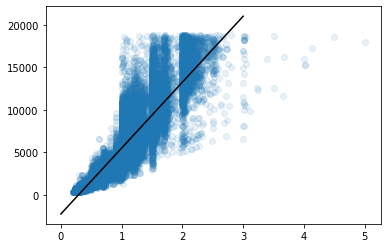

In [ ]:
# Plot the model prediction (no noise) as a smooth curve
X_model = [[0], [3]] # dependent variable, no noise
yhat_model = model.predict(X_model) # compute the model prediction

plt.plot(X_model, yhat_model, color='k')

# Plot the data (scatterplot)
plt.scatter(df['carat'], df['price'], alpha=.1)
plt.show();

# Evaluate model performance

Investigate two methods of creating a train/test split.


In [ ]:
# Train-test split with scikit-learn
from sklearn.model_selection import train_test_split

# Train-test split -- split the dataset
def my_train_test_split(X, y, test_size=.3):
    n_training_samples = int((1.0 - test_size) * X.shape[0])

    X_train = X[:n_training_samples,:]
    y_train = y[:n_training_samples]

    X_test = X[n_training_samples:,:]
    y_test = y[n_training_samples:]

    return X_train, X_test, y_train, y_test

# Train/test split

Choose one of two methods:

* Method #1: simple split of the dataset with `my_train_test_split()`
* Method #2: `scikit-learn.model_selection.train_test_split`


In [ ]:
# Sample the entire dataset
X = df['carat'].values.reshape(-1,1)
y = df['price'].values

# Method #1: Train/test split based on sequential sampling of the dataset
X_train, X_test, y_train, y_test = my_train_test_split(X, y, test_size=0.3)

# Method #2: Train/test split with scikit-learn (random sampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit the model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate training performance
yhat_train = model.predict(X_train)
print('Explained variance (train): {:.2f}%'.format(100 * explained_variance_score(y_train, yhat_train)))

# Evaluate test performance
yhat_test = model.predict(X_test)
print('Explained variance (test): {:.2f}%'.format(100 * explained_variance_score(y_test, yhat_test)))

Explained variance (train): 84.96%
Explained variance (test): 84.87%


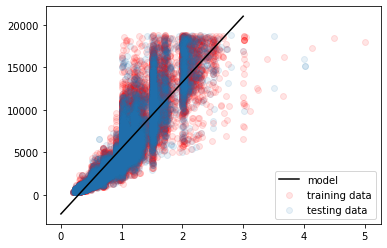

In [ ]:
# Plot the model prediction (no noise) as a smooth curve
X_model = [[0], [3]] # dependent variable, no noise
yhat_model = model.predict(X_model) # compute the model prediction
plt.plot(X_model, yhat_model, color='k', label="model")

# Plot the data (scatterplot)
plt.scatter(X_train, y_train, color=['red'], alpha=.1, label="training data")
plt.scatter(X_test, y_test, alpha=.1, label="testing data")
plt.legend();


Data visualization explains the difference between the two methods of train/test split.

Discussion: The results are very sensitive to the way in which the train/test split is implemented with Method #1. This might be interpreted as overfitting. However, overfitting is not what you would expect with a large dataset (more than 50K samples) and a very simple linear-regression model. But data visualization reveals that the sensitivity with Method #1 is really a symptom of model bias combined with non-uniform sampling in the dataset. In fact, with a train/test split based on randomized sampling (Method #2), training and test performance are nearly identical.

Note: To keep things simple, the analysis below doesn't use train/test splits.

# Linear regression with polynomials in scikit-learn

* Plots above are generated with seaborn, which is easy and good for EDA
* Scikit-learn is the preferred resource for production data science
* [polynomial regression](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions) -- scikit-learn

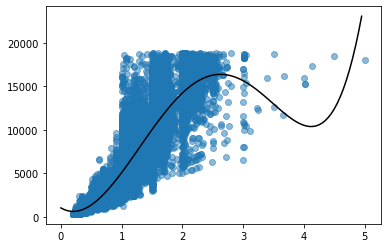

Explained variance: 87.00%


In [ ]:
# Linear regression with polynomials is built-in with Seaborn
# With Scikit-Learn, you need to do it yourself.
from sklearn.preprocessing import PolynomialFeatures

# Add PolynomialFeatures of desired degree
# Inspect X to confirm the result (original series is in column #1
# Column #0 is full of ones (i.e., the intercept)
# To plot a line, use degree=1, in which case X_poly has 2 columns
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Fit the model to the data
# Note: PolynomialFeatures adds the intercept (ones) to column 0
# hence fit_intercept=False, and the data gets moved to column 1
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

# Plot the model prediction (no noise) as a smooth curve
X_model = np.arange(0, 5, .05).reshape(-1, 1) # dependent variable, no noise
X_model = poly.transform(X_model) # add the polynomials
yhat_model = model.predict(X_model) # compute the model prediction
plt.plot(X_model[:,1], yhat_model, color='k') # remember: column 1 is the dependent variable

# Plot the data (scatterplot)
plt.scatter(X[:,0], y, alpha=.5)
plt.show();

# Compute the model prediction at the data points
yhat = model.predict(X_poly)

print('Explained variance: {:.2f}%'.format(100 * explained_variance_score(y, yhat)))

# Residuals

* The simple linear regression model (above) clearly suffers from being oversimplified (high bias).
* Linear regression with a high-order polynomial model has problems as well.
    * The problems are worse where the data are sparse.
* Visualize the residuals to help assess model performance
    * In particular, check for "structure" in residuals that's inconsistent with random noise.

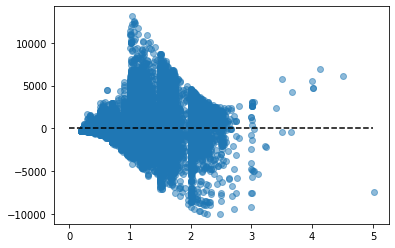

In [ ]:
# Plot the residuals
plt.scatter(X[:,0], y - yhat, alpha=.5)
plt.plot([0, 5], [0,0], linestyle="dashed", color="k")
plt.show();

# Exercise

* Investigate different values for "degree" in PolynomialFeatures
    * Results:
    * degree = 1 is a linear fit
    * degree > 1 produces strange features where data are sparse
        * but the degree doesn't matter where data are dense
* Investigate the impact of sub-sampling scheme

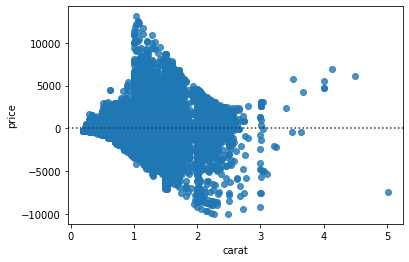

In [ ]:
# Plot the residuals for the linear model
df = diamonds

sns.residplot(x="carat", y="price", data=df, order=5, line_kws=line_kws, label="linear");

# Logarithmic dependency?

* Clearly there's structure in the residuals -- is it logarithmic?
* `seaborn.regplot` has a `logx=True` parameter
    * Seaborn performs linear regression is `y ~ log(x)`
    * the scatterplot and regression model plots are linear in `x`

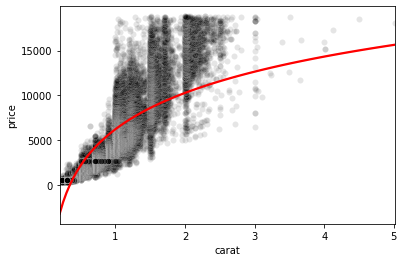

In [ ]:
sns.scatterplot(x="carat", y="price", data=df, alpha=.1, color="black")
sns.regplot(x="carat", y="price", data=df, logx=True, scatter=False, line_kws=line_kws)
plt.show()

# Log scales
* We've reached a limitation with Seaborn
* Exponential structure suggests logarithmic scale transformation...
    * ...but `log(x)` isn't helpful in this case
* We can see that by transforming `x` ourselves with matplotlib

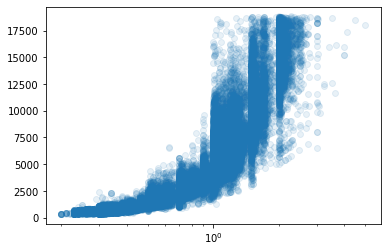

In [ ]:
# Log-x scaling for the independent variable (x = carat)
plt.scatter(df['carat'], df['price'], alpha=.1)
plt.gca().set_xscale('log');

* What about `log(y)`?
* Again, this can be visualized with matplotlib

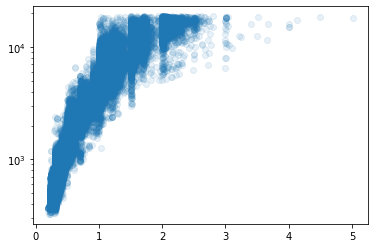

In [ ]:
# Log scaling for the dependent variable (y = price)
plt.scatter(df['carat'], df['price'], alpha=.1)
plt.gca().set_yscale('log');

* And log-log?

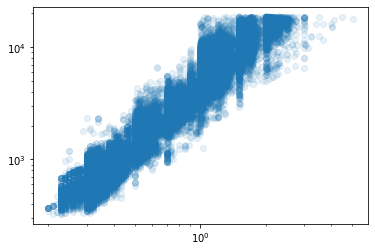

In [ ]:
# Data seem relatively linear with log-log scales
plt.scatter(df['carat'], df['price'], alpha=.1)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log');

# Modeling logarithmic dependencies

* log transformation of the data - create two new columns
* transform both feature & target variables for log-log regression
* perform linear regression with log-transformed variables

In [ ]:
# Create a column with log(price) and a column with log(carat)
diamonds['log(price)'] = diamonds['price'].transform(np.log10)
diamonds['log(carat)'] = diamonds['carat'].transform(np.log10)

In [ ]:
# Linear regression with log-transformed data
df = diamonds

X = df[['log(carat)']]
y = df['log(price)']

# Fit the model to the data
model = LinearRegression()
model.fit(X, y)

# Predict the data with the model
yhat = model.predict(X)

# Assign model to a new column in the dataframe
df = df.assign(model_loglog = yhat)

# Evaluate the performance
print('Explained variance: {:.2f}%'.format(100 * explained_variance_score(y, yhat)))

Explained variance: 93.30%


In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,log(price),log(carat),model_loglog
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2.513218,-0.638272,2.599580
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2.513218,-0.677781,2.533370
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.514548,-0.638272,2.599580
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2.523746,-0.537602,2.768284
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.525045,-0.508638,2.816822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3.440437,-0.142668,3.430122
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3.440437,-0.142668,3.430122
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3.440437,-0.154902,3.409619
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3.440437,-0.065502,3.559438


# Residuals with log-log scaling

Is this better?

Be careful about comparing explained variance -- we've rescaled the data.

We need a way to assess the assumption of model + random noise. We'll further analyze the residuals.

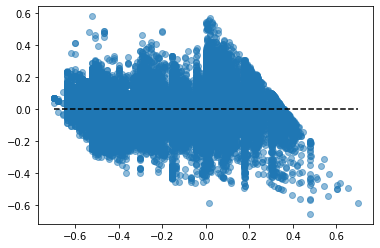

In [ ]:
# Plot the residuals
X = df['log(carat)']
residuals = df['log(price)'] - df['model_loglog']

plt.scatter(X, residuals, alpha=.5)
plt.plot([-.7, .7], [0,0], linestyle="dashed", color="k")
plt.show();

# Log-log scaling with seaborn

A note about seaborn...

* Seaborn is a good visualization tool for EDA, but it is not the right tool for analysis
    * With Seaborn, the scatter plot is drawn using PathCollection
    * x, y data are called "offsets" and **can** be recovered from the axes
    * the next cell gets a copy of the offsets for later use, but...
    * although we can do it, this approach is limited and it's error prone
* Scikit-learn is the right way to go

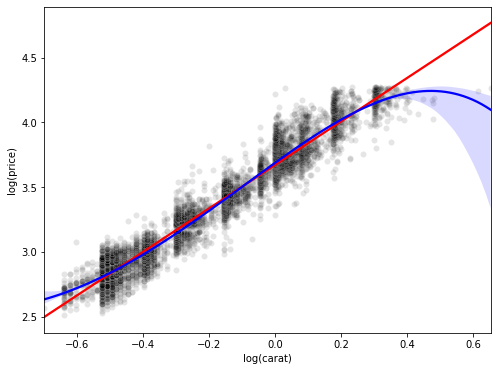

In [ ]:
# Subsample the data (runs more quickly)
df_s = diamonds.iloc[::10, :]

sns.scatterplot(x="log(carat)", y="log(price)", data=df_s, alpha=.1, color="black")
sns.regplot(x="log(carat)", y="log(price)", data=df_s, order=0, scatter=False, line_kws=line_kws)
sns.regplot(x="log(carat)", y="log(price)", data=df_s, order=5, scatter=False, line_kws=curve_kws)

# figure size
fig = plt.gcf()
fig.set_size_inches(8,6)

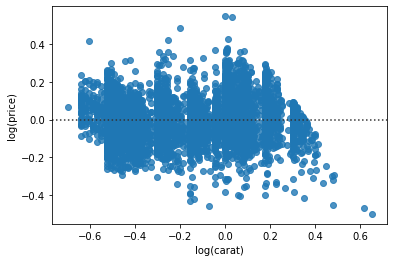

In [ ]:
# Plot the residuals (of the linear log-log regression model)
sns.residplot(x="log(carat)", y="log(price)", data=df_s, order=0, line_kws=line_kws, label="linear")

# Recovering the residual values from the residual plot is possible, but it's not a great idea
assert len(plt.gca().collections) == 1
offsets = plt.gca().collections[0].get_offsets()

plt.show();

# Visualizing data distributions

* Statistical assessment of data and residuals
* Histograms with matplotlib
    * assessing the assumption of random noise
    * looking for [skewness](https://en.wikipedia.org/wiki/Skewness) or other departures from normal distribution
    * styling with the matplotlib API
* Clearly, diamond "price" is skewed

axes: AxesSubplot(0.125,0.125;0.775x0.755)
lines (histograms do not use lines): <a list of 0 Line2D objects>
children: <class 'list'> 20
children[0]: Rectangle(xy=(326, 0), width=1849.7, height=25335, angle=0)


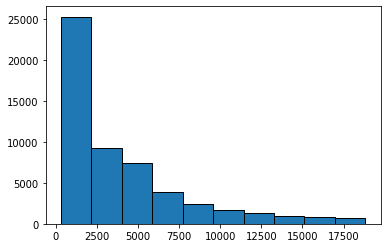

In [ ]:
from matplotlib.patches import Rectangle

# Histogram of price is highly skewed (positive or right skew)
plt.hist(diamonds['price']);

# Histogram styling. It can be done, but...
ax = plt.gca()
lines = ax.get_lines()
children = ax.get_children()
print('axes:', ax)
print('lines (histograms do not use lines):', lines)
print('children:', type(children), len(children))
print('children[0]:', children[0])
[child.set_edgecolor('k') for child in children if isinstance(child, Rectangle)];

# EXERCISE

Create a convenience function for styled histograms

In [ ]:
# Convenience function for styled histograms
def styled_histogram(series):
    plt.hist(series)
    ax = plt.gca()
    children = ax.get_children()
    [child.set_edgecolor('k') for child in children if isinstance(child, Rectangle)];

# EXERCISE

* Compare distributions of price & log(price)
* Compare distributions residuals from log-log model

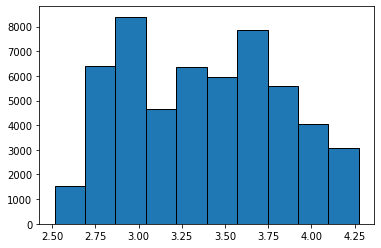

In [ ]:
# Distribution of log(price) is much more symmetric
styled_histogram(df['log(price)'])

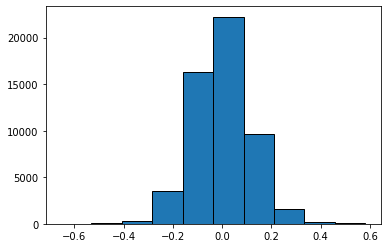

In [ ]:
# Plot the histogram of the residuals from the linear regression of log-log data
residuals = y - yhat
styled_histogram(residuals)

# Q-Q plot

The distributions are symmetric, but are they "good"? And what is a metric for "good"?

* Quantiles (Q-Q plot) of data compared with theoretical probability distributions (probability plot)
* [Quantiles](https://en.wikipedia.org/wiki/Quantile) are values dividing a probability density into equal areas
* Using the scipy.stats library, default theoretical distribution is standard normal
* Using statsmodels, the default distribution is scipy.stats.distributions.norm

### references

* [scipy reference docs](https://docs.scipy.org/doc/scipy/reference/) -- scipy.org
* [scipy.stats.probplot()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) -- scipy.org



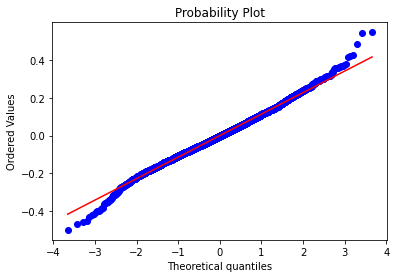

In [ ]:
from scipy import stats

# Q-Q plot (data vs standard normal)
stats.probplot(offsets[:,1], plot=plt);

# EXERCISE

Create a convenience function for a styled Q-Q plot

### styling

`stats.probplot()` uses 2 plots types (line and scatterplot) with harsh colors

* [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) -- wikipedia
* [scipy.stats.probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) API reference docs - scipy.org
    * plots quantiles of data against Normal distribution (default)
* Q: Can I change the colors?
* A: Yes, but the `scipy.stats` API docs don't speak to this.
    * You need to use the matplotlib API

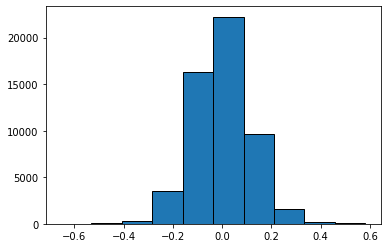

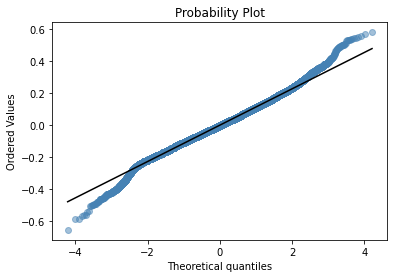

In [ ]:
def qqplot(data):
    stats.probplot(data, plot=plt)

    # Change the styling
    ax = plt.gca()
    lines = ax.get_lines() # there are two -- dots and line
    lines[0].set_markerfacecolor("steelblue")
    lines[0].set_markeredgecolor("steelblue")
    lines[0].set_alpha(0.5)
    lines[1].set_color('k');

styled_histogram(residuals)
plt.show()

qqplot(residuals)

# Bad residuals -- linear scales



In [ ]:
X_linear = df[['carat']]
y_linear = df['price']

# Fit the model to the data
model = LinearRegression()
model.fit(X_linear, y_linear)

# Evaluate the performance
yhat_linear = model.predict(X_linear)
residuals_linear = y_linear - yhat_linear
print('Explained variance: {:.2f}%'.format(100 * explained_variance_score(y_linear, yhat_linear)))

Explained variance: 84.93%


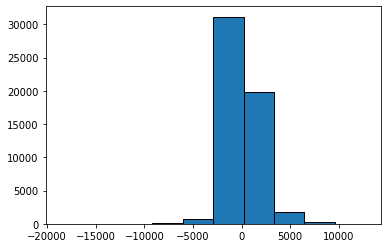

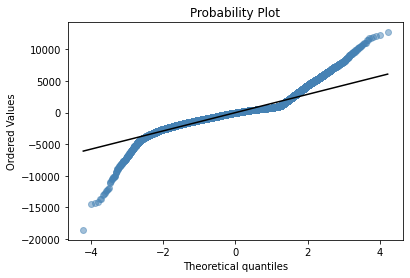

In [ ]:
styled_histogram(residuals_linear)
plt.show();

qqplot(residuals_linear)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


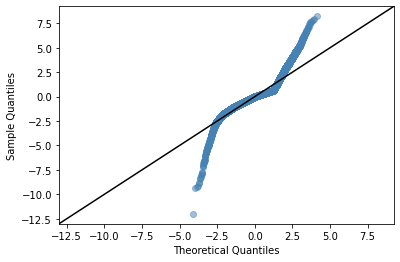

In [ ]:
# Q-Q plot with statsmodels
import statsmodels.api as sm
sm.qqplot(residuals_linear, fit=True, line="45")

# Change the styling
ax = plt.gca()
lines = ax.get_lines() # there are two -- dots and line
lines[0].set_markerfacecolor("steelblue")
lines[0].set_markeredgecolor("steelblue")
lines[0].set_alpha(0.5)
lines[1].set_color('k');

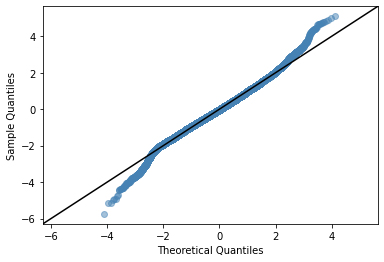

In [ ]:
# Q-Q plot with statsmodels
import statsmodels.api as sm
sm.qqplot(residuals, fit=True, line="45")

# Change the styling
ax = plt.gca()
lines = ax.get_lines() # there are two -- dots and line
lines[0].set_markerfacecolor("steelblue")
lines[0].set_markeredgecolor("steelblue")
lines[0].set_alpha(0.5)
lines[1].set_color('k');

# EXERCISE

Visualize the relationship between residuals in log-log model and cut, clarity, color
* First, show students how to do a boxplot
* Then let them filter the residuals and visualize relationship

# Boxplots

* [boxplot demo](https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html)
* [matplotlib.pyplot.boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) API reference docs

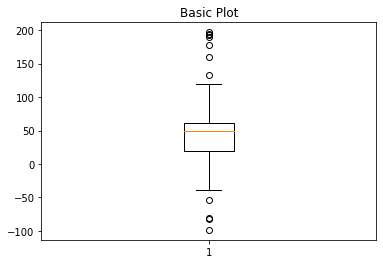

In [ ]:
# Random data
np.random.seed(42)
spread = np.random.rand(50) * 100 # random numbers (mean 50) (50 of them)
center = np.ones(25) * 50  # constants = 50 (25 of them)
flier_high = np.random.rand(10) * 100 + 100 # 10 extra large values
flier_low = np.random.rand(10) * -100 # 10 extra small values
data = np.concatenate((spread, center, flier_high, flier_low))
assert data.shape == (95,)

# Create the boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data);

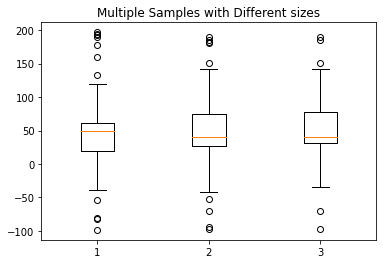

In [ ]:
# Add more random data 
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))

# Create an array of dataframes, with one dataframe for each subplot
my_list = [data, d2, d2[::2]] # This works, but boxplot wants an array
# my_array = np.array(my_list)  # This conversion issues a deprecation warning
my_array = np.array(my_list, dtype="object") # This is the right way

fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(my_array); # With "my_list", boxplot issues a deprecation warning

plt.show();

# Other candidate predictors

In [ ]:
print('Unique cuts:', df['cut'].unique())
print('Unique colors:', df['color'].unique())
print('Unique clarities:', df['clarity'].unique())

Unique cuts: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique colors: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique clarities: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log(price),log(carat),model_loglog,resid
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2.513218,-0.638272,2.599580,-0.086362
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2.513218,-0.677781,2.533370,-0.020153
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.514548,-0.638272,2.599580,-0.085032
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2.523746,-0.537602,2.768284,-0.244538
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.525045,-0.508638,2.816822,-0.291777


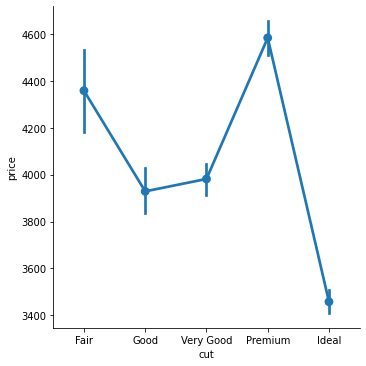

In [ ]:
# Another visualization of the same data -- Q: Is this more informative?
import seaborn as sns

cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

sns.catplot(data=df, x="cut", y="price", kind="point", order=cuts);

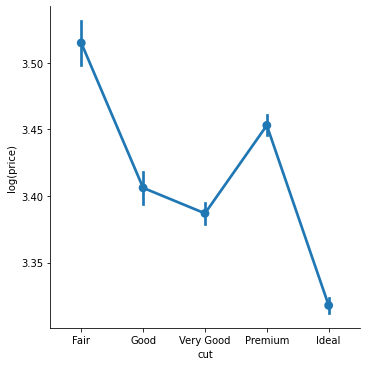

In [ ]:
sns.catplot(data=df, x="cut", y="log(price)", kind="point", order=cuts);

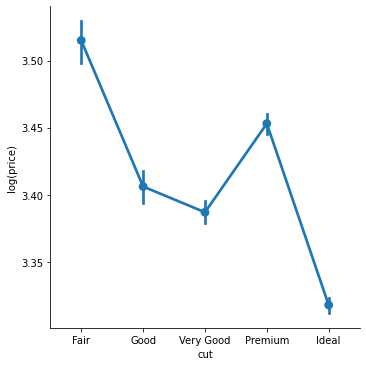

In [ ]:
sns.catplot(data=df, x="cut", y="log(price)", kind="point", order=cuts);

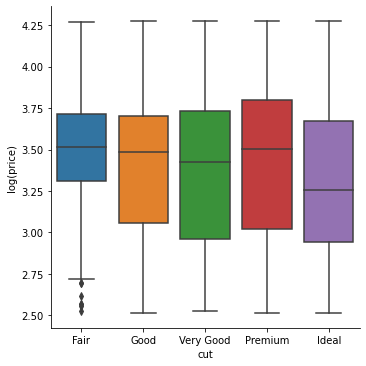

In [ ]:
sns.catplot(data=df, x="cut", y="log(price)", kind="box", order=cuts);

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,log(price),log(carat),model_loglog,resid
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2.513218,-0.638272,2.599580,-0.086362
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2.513218,-0.677781,2.533370,-0.020153
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.514548,-0.638272,2.599580,-0.085032
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2.523746,-0.537602,2.768284,-0.244538
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.525045,-0.508638,2.816822,-0.291777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3.440437,-0.142668,3.430122,0.010315
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3.440437,-0.142668,3.430122,0.010315
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3.440437,-0.154902,3.409619,0.030817
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3.440437,-0.065502,3.559438,-0.119001


## Comparing residuals of linear regression (of log-log model)

Visualize the relationship between diamond "cut" and residuals

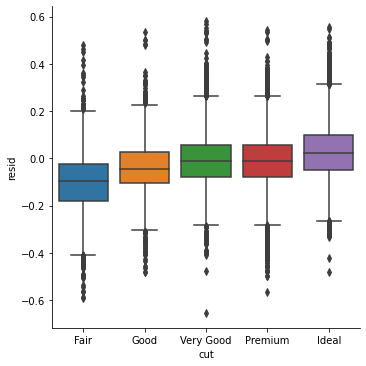

In [ ]:
df['resid'] = df['log(price)'] - df['model_loglog']
df

sns.catplot(data=df, x="cut", y="resid", kind="box", order=cuts);

# Linear regression with categorical features

* You can do linear regression with categorical features
  * one-hot encoding of categorical features
  * use `drop="first"` (to avoid colinear inputs)
* predict log(price)
* add log(carat) as a feature
* [6.3 Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) (sklearn.preprocessing package) -- scikit-learn.org
    * [6.3.4 Encoding categorical features](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) -- scikit-learn.org
    * One-hot encoding of categorical features (indicator variables)
* Documentation discusses `drop="feature"` parameter that avoids colinear inputs
    * Colinear inputs would cause non-regularized linear regression to fail

In [ ]:
# Multivariate linear regression of residuals from log-log model
# Uses one-hot encoding of the categorical features
from sklearn import preprocessing
from scipy.sparse import hstack
from sklearn.metrics import explained_variance_score

enc = preprocessing.OneHotEncoder(drop="first")
#enc = preprocessing.OneHotEncoder()

y = df['resid']
X = df.loc[:, ['cut', 'color', 'clarity']].values

X = enc.fit_transform(X)

model = LinearRegression()
model.fit(X, y)

yhat = model.predict(X)

print('Explained variance (before): {:.2f}%'.format(100 * explained_variance_score(df['log(price)'], df['model_loglog'])))
print('Explained variance (after): {:.2f}%'.format(100 * explained_variance_score(df['log(price)'], df['model_loglog'] + yhat)))

Explained variance (before): 93.30%
Explained variance (after): 97.17%


In [ ]:
# Multivariate linear regression with one-hot encoding of categorical features
# This model includes log(carat) as a variable in the model
from sklearn import preprocessing
from scipy.sparse import hstack
from sklearn.metrics import explained_variance_score

enc = preprocessing.OneHotEncoder(drop="first")
#enc = preprocessing.OneHotEncoder()

y = df['log(price)']
X = df.loc[:, ['cut', 'color', 'clarity']].values

X = enc.fit_transform(X)

print(type(X))
print("X.shape:", X.shape)
print(len(enc.categories_))
print(enc.categories_)
print('df[log(carat)].shape', df['log(carat)'].values.reshape(-1,1).shape)

X = hstack((X, df[['log(carat)']].values))

model = LinearRegression()
model.fit(X, y)

yhat = model.predict(X)

print('Explained variance (before): {:.2f}%'.format(100 * explained_variance_score(y, df['model_loglog'])))
print('Explained variance (after): {:.2f}%'.format(100 * explained_variance_score(y, yhat)))

<class 'scipy.sparse.csr.csr_matrix'>
X.shape: (53940, 17)
3
[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
df[log(carat)].shape (53940, 1)
Explained variance (before): 93.30%
Explained variance (after): 98.26%
